In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

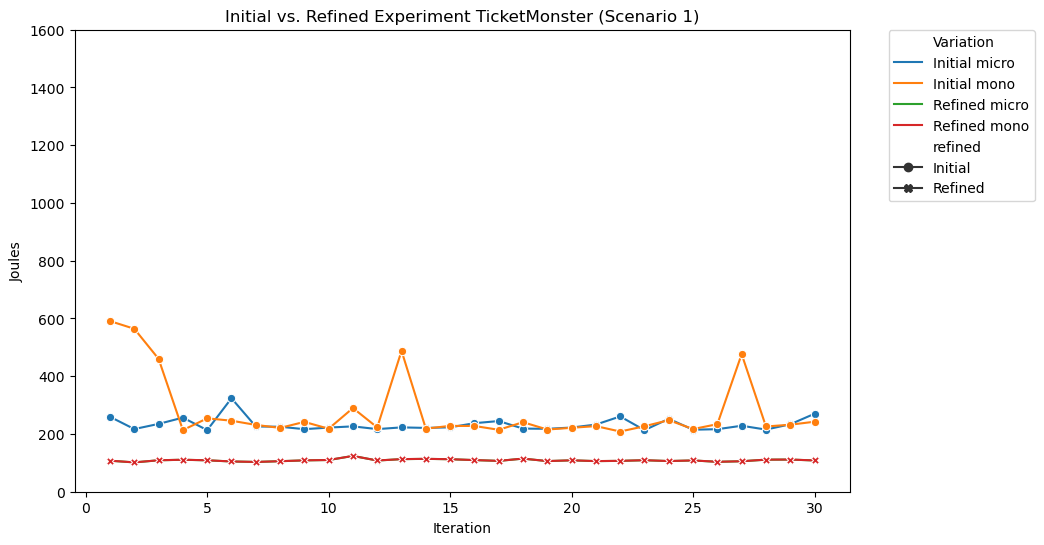

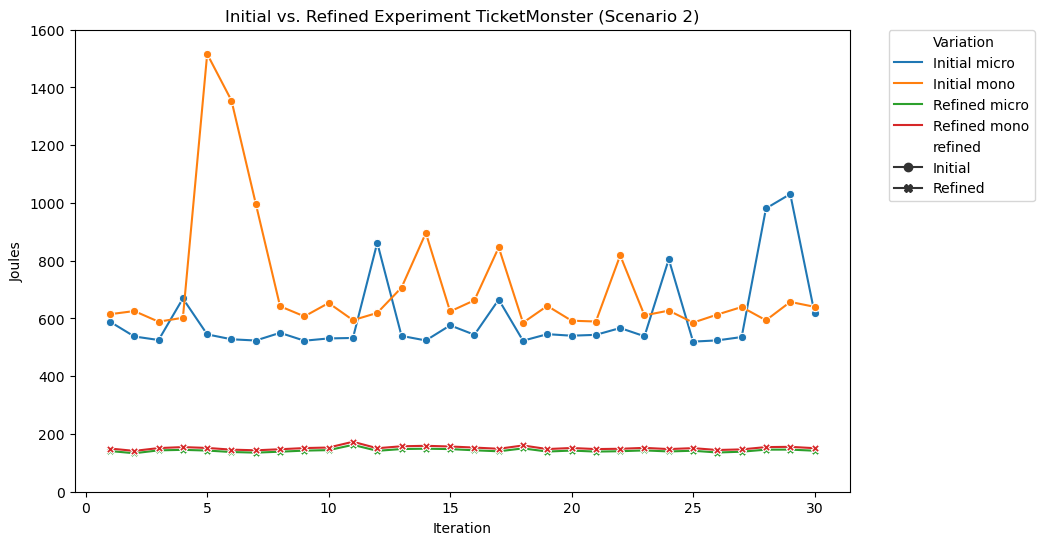

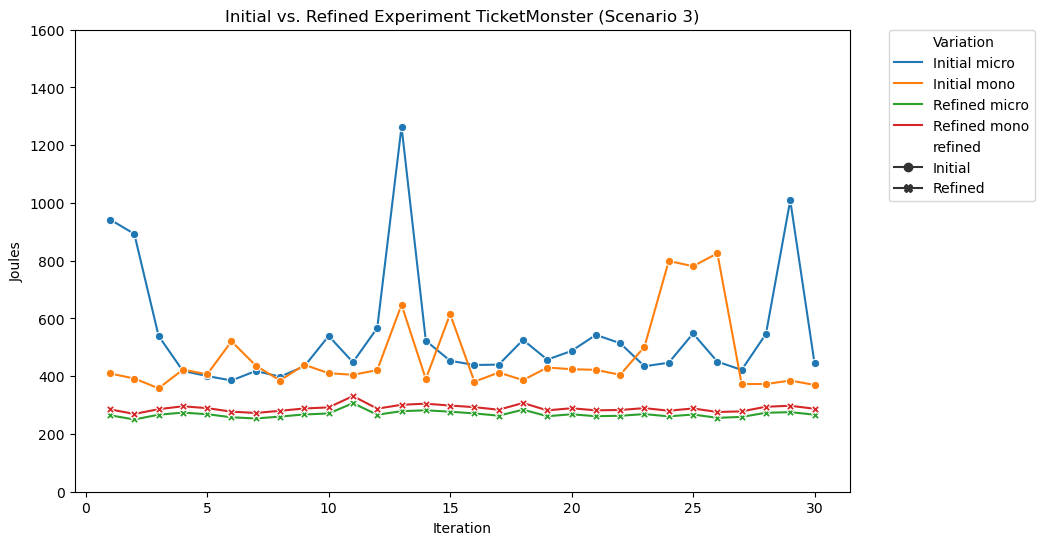

In [25]:
# Load the data
df = pd.read_csv('combined.csv')

# Replace the values in the "refined" column
df["refined"] = df["refined"].replace({False: "Initial", True: "Refined"})

# Create a new column that combines the "refined" and "Architecture" columns
df["Variation"] = df["refined"].astype(str) + " " + df["Architecture"]

# Get the unique scenarios
scenarios = df["ScenarioPath"].unique()

# Create a plot for each scenario
for scenario in scenarios:
    plt.figure(figsize=(10, 6))
    subset = df[df["ScenarioPath"] == scenario]
    sns.lineplot(data=subset, x="Iteration", y="Joules", hue="Variation", style="refined", markers=True, dashes=False)
    plt.title(f'Initial vs. Refined Experiment TicketMonster (Scenario {scenario})')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylim(0,1600)
    plt.show()

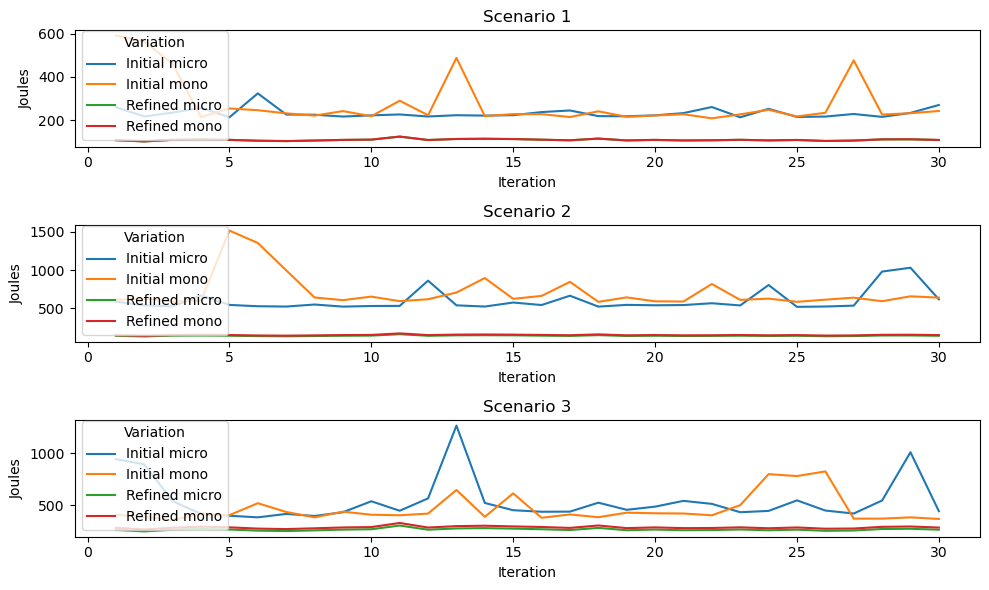

In [21]:
# Create subplots for each scenario
scenarios = df["ScenarioPath"].unique()

fig, axs = plt.subplots(len(scenarios), figsize=(10, 6))

for i, scenario in enumerate(scenarios):
    subset = df[df["ScenarioPath"] == scenario]
    sns.lineplot(data=subset, x="Iteration", y="Joules", hue="Variation", markers=True, dashes=False, ax=axs[i])
    axs[i].set_title(f'Scenario {scenario}')

plt.tight_layout()
plt.show()

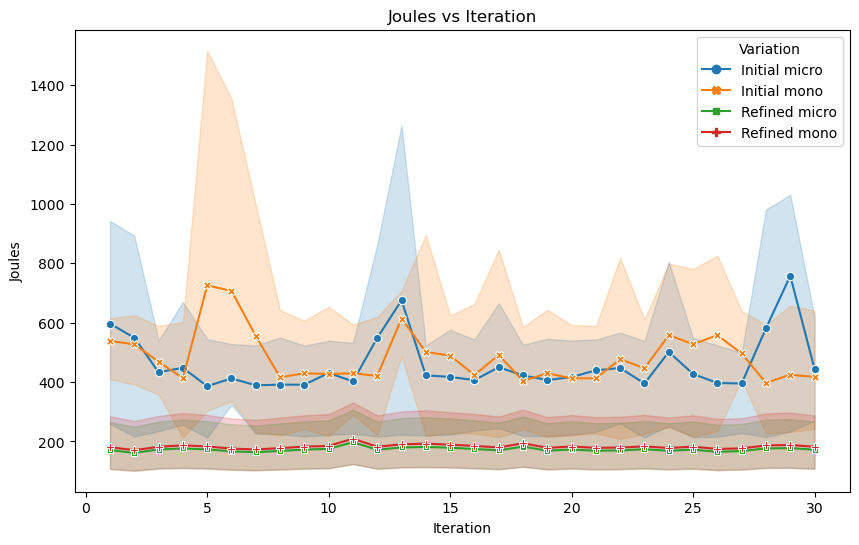

In [22]:
# Create a line plot with different markers for each variation
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Iteration", y="Joules", hue="Variation", style="Variation", markers=True, dashes=False)

plt.title('Joules vs Iteration')
plt.show()